In [1]:
import csv
import skimage
from skimage import data
from numpy import array
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import timeit

In [3]:
csv.register_dialect('myDialect',
delimiter = ',',
skipinitialspace=True)
trainImages=[]
trainLabels=[]
testImages=[]
testLabels=[]
with open('trainVal.csv','r') as csvFile:
    reader = csv.reader(csvFile,dialect='myDialect')
    for row in reader:
        if row[3]=='1':
            img=skimage.data.imread(row[1])
            img = skimage.transform.resize(img,(40,200,3))
            
            
            #### face different length of license
            x_trainLabel=str(row[2])
            if len(x_trainLabel)==7:
                trainImages.append(img)
                trainLabels.append(x_trainLabel[0:3]+'#'+x_trainLabel[3:])
            if len(x_trainLabel)==6:
                trainImages.append(img)
                trainLabels.append(x_trainLabel[0:3]+'..'+x_trainLabel[3:])
            if len(x_trainLabel)==5:
                trainImages.append(img)
                trainLabels.append(x_trainLabel[0]+'###'+x_trainLabel[1:])
                
#         if row[3]=='0':
#             img=skimage.data.imread(row[1])
#             img = skimage.transform.resize(img,(40,200,3))
            
            
#             x_testLabel=str(row[2])
#             if len(x_testLabel)==7:
#                 testImages.append(img)
#                 testLabels.append(x_testLabel[0:3]+'#'+x_testLabel[3:])
#             if len(x_testLabel)==6:
#                 testImages.append(img)
#                 testLabels.append(x_testLabel[0:3]+'..'+x_testLabel[3:])
#             if len(x_trainLabel)==5:
#                 testImages.append(img)
#                 testLabels.append(x_testLabel[0]+'###'+x_testLabel[1:])
        
        #print(row,row[3])
        

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [4]:
len(trainImages),len(trainLabels)

(105671, 105671)

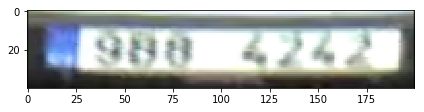

In [5]:
skimage.io.imshow(trainImages[100001])

In [6]:
trainLabels[100001]

'9B8#4242'

In [7]:
# len(testLabels),len(testImages)

In [8]:
# skimage.io.imshow(testImages[10001])

In [9]:
# testLabels[10001]

In [7]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils

Using TensorFlow backend.


In [8]:
# define universe of possible input values
alphabet = '0123456789abcdefghijklmnopqrstuvwxyz#. '.upper()

In [9]:
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

In [13]:
len(alphabet)

39

In [14]:
#len(testLabels)

In [10]:
#print how many license less than 8 characters
i=0
for label in trainLabels:
    if len(label)<8:
        print(label)
        i=i+1

In [16]:
#skimage.io.imshow('s04_l01/882_1.png')

In [17]:
#skimage.io.imshow('s01_l01/142_1.png')

In [18]:
#skimage.io.imshow('s02_l01/1212_1.png')

In [11]:
#one hot encoding labels
list_trainLabels=list()

for label in trainLabels:
    train_encoded = [char_to_int[char] for char in label]
    for value in train_encoded:
        letter = [0 for _ in range(len(alphabet))]
        letter[value] = 1
        list_trainLabels.append(letter)

In [20]:
#x = np.reshape(list_trainLabels,(len(trainLabels)*8,39))

In [21]:
#y= np.reshape(list_testLabels,(len(testLabels)*8,39))

In [22]:
#x[0:8]

In [23]:
####check the correct encoding
# for i in range(1000*8,1000*8+16):
#     print(trainLabels[1000])
#     print(int_to_char[argmax(x[i])])


In [12]:
trainImages[0].shape[0]

40

In [13]:
###############data struture

In [14]:
trainX=np.array(trainImages)


In [15]:
trainY=np.array(list_trainLabels)


In [16]:
trainY=trainY.reshape(len(trainLabels),8,39)
trainX=trainX.reshape(len(trainX),trainX[0].shape[0],
                           trainX[0].shape[1],
                           trainX[0].shape[2]).astype("float32")/255


In [17]:
type(trainX[0])

numpy.ndarray

In [18]:
type(trainY[0])

numpy.ndarray

In [19]:
#trainY[0]

In [20]:
trainX[0].shape,trainY[0].shape,len(trainX),len(trainY)

((40, 200, 3), (8, 39), 105671, 105671)

In [21]:
type(trainY)

numpy.ndarray

In [22]:
#skimage.io.imshow(trainX[10000])

In [23]:
for ttt in trainY[10000]:
    print(int_to_char[argmax(ttt)])
    

6
B
5
#
3
1
0
6


In [24]:
del trainImages
del trainLabels


NameError: name 'list_' is not defined

In [25]:
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, Flatten,Activation,MaxPooling2D,Input
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import concatenate
from keras import layers
import keras
import tensorflow as tf

#create model
model = Sequential()
#add model layers

#####frist sequence
Input_1= Input(shape=(40,200,3))

conv1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(Input_1)
bn1=BatchNormalization()(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(bn1)
bn2=BatchNormalization()(conv2)
conv3 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(bn2)
bn3=BatchNormalization()(conv3)

pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(bn3)
####second sequence
conv4 = Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(pool1)
bn4=BatchNormalization()(conv4)
conv5 = Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(bn4)
bn5=BatchNormalization()(conv5)
conv6 = Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(bn5)
bn6=BatchNormalization()(conv6)

pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(bn6)

###third sequence
conv7 = Conv2D(128, (3,3), activation = 'relu', padding = "SAME")(pool2)
bn7=BatchNormalization()(conv7)
conv8 = Conv2D(128, (3,3), activation = 'relu', padding = "SAME")(bn7)
bn8=BatchNormalization()(conv8)
conv9 = Conv2D(128, (3,3), activation = 'relu', padding = "SAME")(bn8)
bn9=BatchNormalization()(conv9)

pool3 = MaxPooling2D(pool_size = (2,2), strides = 2)(bn9)




flat_1 = Flatten()(pool3)
#x = Dense(100, activation='relu')(flat_1)
# x = Dense(100, activation='relu')(x)
#fully connected 1


# x1 = Dense(16000, activation='linear')(flat_1)
# x2 = Dense(16000, activation='linear')(flat_1)
# x3 = Dense(16000, activation='linear')(flat_1)
# x4 = Dense(16000, activation='linear')(flat_1)
# x5 = Dense(16000, activation='linear')(flat_1)
# x6 = Dense(16000, activation='linear')(flat_1)
# x7 = Dense(16000, activation='linear')(flat_1)
# x8 = Dense(16000, activation='linear')(flat_1)

#fully connected2

# x1_1 = Dense(128, activation='linear')(x1)
# x2_1 = Dense(128, activation='linear')(x2)
# x3_1 = Dense(128, activation='linear')(x3)
# x4_1 = Dense(128, activation='linear')(x4)
# x5_1 = Dense(128, activation='linear')(x5)
# x6_1 = Dense(128, activation='linear')(x6)
# x7_1 = Dense(128, activation='linear')(x7)
# x8_1 = Dense(128, activation='linear')(x8)

x1_1 = Dense(128, activation='linear')(flat_1)
x2_1 = Dense(128, activation='linear')(flat_1)
x3_1 = Dense(128, activation='linear')(flat_1)
x4_1 = Dense(128, activation='linear')(flat_1)
x5_1 = Dense(128, activation='linear')(flat_1)
x6_1 = Dense(128, activation='linear')(flat_1)
x7_1 = Dense(128, activation='linear')(flat_1)
x8_1 = Dense(128, activation='linear')(flat_1)




out1 = Dense(39,  activation='softmax')(x1_1)
out2 = Dense(39,  activation='softmax')(x2_1)
out3 = Dense(39,  activation='softmax')(x3_1)
out4 = Dense(39,  activation='softmax')(x4_1)
out5 = Dense(39,  activation='softmax')(x5_1)
out6 = Dense(39,  activation='softmax')(x6_1)
out7 = Dense(39,  activation='softmax')(x7_1)
out8 = Dense(39,  activation='softmax')(x8_1)
output_1=[out1,out2,out3,out4,out5,out6,out7,out8]
model = Model(inputs=[Input_1], outputs=output_1)
# model = Model(inputs=Input_1, outputs=[layer.get_output_shape_at(out1)
#                                        ,layer.get_output_shape_at(out2)
#                                        ,layer.get_output_shape_at(out3)
#                                        ,layer.get_output_shape_at(out4)
#                                        ,layer.get_output_shape_at(out5)
#                                        ,layer.get_output_shape_at(out6)
#                                        ,layer.get_output_shape_at(out7)
#                                        ,layer.get_output_shape_at(out8)
#                                        ])
adam=keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy',metrics=['accuracy'])






#####
"""
main=model.add(Conv2D(32, kernel_size=3,padding='same',input_shape=trainX[0].shape))
main=model.add(BatchNormalization())
main=model.add(Activation('relu'))
main=model.add(MaxPooling2D(pool_size=(2, 2)))

main=model.add(Conv2D(64, kernel_size=3, padding='same'))
main=model.add(BatchNormalization())
main=model.add(Activation('relu'))
main=model.add(MaxPooling2D(pool_size=(2, 2)))
main=model.add(Conv2D(128, kernel_size=3, padding='same'))
main=model.add(BatchNormalization())
main=model.add(Activation('relu'))
main=model.add(MaxPooling2D(pool_size=(2, 2)))


o1 = Dense(16000,  activation='linear')(main)
d1= Dense(128,  activation='linear')(o1)
s1=Dense(39, activation = 'softmax')(d1)
o2 = Dense(16000,  activation='linear')(main)
d2= Dense(128,  activation='linear')(o2)
s2=Dense(39, activation = 'softmax')(d2)
# o2 = Dense(16000, activation = 'softmax')(main)
# o3 = Dense(16000, activation = 'softmax')(main)
# o4 = Dense(16000, activation = 'softmax')(main)
# o5 = Dense(16000, activation = 'softmax')(main)
# o6 = Dense(16000, activation = 'softmax')(main)
# o7 = Dense(16000, activation = 'softmax')(main)
# o8 = Dense(16000, activation = 'softmax')(main)

"""

"\nmain=model.add(Conv2D(32, kernel_size=3,padding='same',input_shape=trainX[0].shape))\nmain=model.add(BatchNormalization())\nmain=model.add(Activation('relu'))\nmain=model.add(MaxPooling2D(pool_size=(2, 2)))\n\nmain=model.add(Conv2D(64, kernel_size=3, padding='same'))\nmain=model.add(BatchNormalization())\nmain=model.add(Activation('relu'))\nmain=model.add(MaxPooling2D(pool_size=(2, 2)))\nmain=model.add(Conv2D(128, kernel_size=3, padding='same'))\nmain=model.add(BatchNormalization())\nmain=model.add(Activation('relu'))\nmain=model.add(MaxPooling2D(pool_size=(2, 2)))\n\n\no1 = Dense(16000,  activation='linear')(main)\nd1= Dense(128,  activation='linear')(o1)\ns1=Dense(39, activation = 'softmax')(d1)\no2 = Dense(16000,  activation='linear')(main)\nd2= Dense(128,  activation='linear')(o2)\ns2=Dense(39, activation = 'softmax')(d2)\n# o2 = Dense(16000, activation = 'softmax')(main)\n# o3 = Dense(16000, activation = 'softmax')(main)\n# o4 = Dense(16000, activation = 'softmax')(main)\n# o5 

In [26]:
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 200, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 40, 200, 32)  896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 40, 200, 32)  128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 40, 200, 32)  9248        batch_normalization_1[0][0]      
__________________________________________________________________________________________________
batch_norm

In [39]:
int_to_char[argmax(trainY[100:,0,:])]

'1'

In [45]:
int_to_char[argmax(trainY[100:,4,:])]

'3'

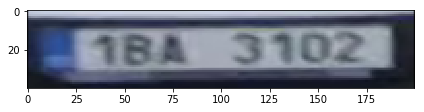

In [43]:
skimage.io.imshow(trainX[100]*255)

In [37]:
trainY.shape

(105671, 8, 39)

In [46]:
n_epoch = 80
start = timeit.default_timer()
model.fit(trainX,[trainY[:,0,:],trainY[:,1,:],trainY[:,2,:],trainY[:,3,:],trainY[:,4,:],trainY[:,5,:],trainY[:,6,:],trainY[:,7,:]], epochs=n_epoch,batch_size=20, shuffle=False,verbose=1)
stop = timeit.default_timer()

print('Time: ', stop - start)  


Epoch 1/80
105671/105671 [==============================] - 861s 8ms/step - loss: 89.5923 - dense_9_loss: 13.2535 - dense_10_loss: 5.2615 - dense_11_loss: 14.9956 - dense_12_loss: 0.0463 - dense_13_loss: 13.9856 - dense_14_loss: 13.9298 - dense_15_loss: 14.0183 - dense_16_loss: 14.1016 - dense_9_acc: 0.1725 - dense_10_acc: 0.6729 - dense_11_acc: 0.0683 - dense_12_acc: 0.9968 - dense_13_acc: 0.1283 - dense_14_acc: 0.1297 - dense_15_acc: 0.1261 - dense_16_acc: 0.1226
Epoch 2/80
105671/105671 [==============================] - 844s 8ms/step - loss: 56.3411 - dense_9_loss: 4.4634 - dense_10_loss: 4.8055 - dense_11_loss: 12.9899 - dense_12_loss: 0.0325 - dense_13_loss: 8.4654 - dense_14_loss: 7.8994 - dense_15_loss: 8.4345 - dense_16_loss: 9.2505 - dense_9_acc: 0.7130 - dense_10_acc: 0.7007 - dense_11_acc: 0.1906 - dense_12_acc: 0.9979 - dense_13_acc: 0.4683 - dense_14_acc: 0.5002 - dense_15_acc: 0.4667 - dense_16_acc: 0.4203
Epoch 3/80
105671/105671 [==============================] - 846s 

In [47]:
print('Time: ', stop - start)

Time:  67760.92765539396


In [57]:
from keras.models import load_model

In [51]:
import os
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'LP_cz_paper.h5'

In [52]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/tang/targa/exp5/saved_models/LP_cz_paper.h5 


In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [50]:
scores = model.evaluate(trainX, [trainY[:,0,:],trainY[:,1,:],trainY[:,2,:],trainY[:,3,:],trainY[:,4,:],trainY[:,5,:],trainY[:,6,:],trainY[:,7,:]], verbose=0)

KeyboardInterrupt: 

In [ ]:
batchsize=100
for i in range(10):
    print('epoch------------------------------------ ', i)
    for j in range(len(trainX)//batchsize):
        print('part: ', j)
        x, y = trainX[j*batchsize: (j+1)*batchsize], [trainY[:,0,:][j*batchsize: (j+1)*batchsize],trainY[:,1,:][j*batchsize: (j+1)*batchsize],trainY[:,2,:][j*batchsize: (j+1)*batchsize],trainY[:,3,:][j*batchsize: (j+1)*batchsize],trainY[:,4,:][j*batchsize: (j+1)*batchsize],trainY[:,5,:][j*batchsize: (j+1)*batchsize],trainY[:,6,:][j*batchsize: (j+1)*batchsize],trainY[:,7,:][j*batchsize: (j+1)*batchsize]]
        c = model.train_on_batch(x, y)

epoch------------------------------------  0
part:  0


In [ ]:
with open('trainVal.csv','r') as csvFile:
    reader = csv.reader(csvFile,dialect='myDialect')
    for row in reader:
#         if row[3]=='1':
#             img=skimage.data.imread(row[1])
#             img = skimage.transform.resize(img,(40,200,3))
            
            
#             #### face different length of license
#             x_trainLabel=str(row[2])
#             if len(x_trainLabel)==7:
#                 trainImages.append(img)
#                 trainLabels.append(x_trainLabel[0:3]+'#'+x_trainLabel[3:])
#             if len(x_trainLabel)==6:
#                 trainImages.append(img)
#                 trainLabels.append(x_trainLabel[0:3]+'..'+x_trainLabel[3:])
#             if len(x_trainLabel)==5:
#                 trainImages.append(img)
#                 trainLabels.append(x_trainLabel[0]+'###'+x_trainLabel[1:])
                
        if row[3]=='0':
            img=skimage.data.imread(row[1])
            img = skimage.transform.resize(img,(40,200,3))
            
            
            x_testLabel=str(row[2])
            if len(x_testLabel)==7:
                testImages.append(img)
                testLabels.append(x_testLabel[0:3]+'#'+x_testLabel[3:])
            if len(x_testLabel)==6:
                testImages.append(img)
                testLabels.append(x_testLabel[0:3]+'..'+x_testLabel[3:])
            if len(x_trainLabel)==5:
                testImages.append(img)
                testLabels.append(x_testLabel[0]+'###'+x_testLabel[1:])
        
        #print(row,row[3])

In [ ]:
list_testLabels=list()
for testlabel in testLabels:
    test_encoded = [char_to_int[char] for char in testlabel]
    for value in test_encoded:
        letter = [0 for _ in range(len(alphabet))]
        letter[value] = 1
        list_testLabels.append(letter)

In [ ]:
testY=testY.reshape(len(testLabels),8,39)
testX=testX.reshape(len(testImages),testImages[0].shape[0],
                           testImages[0].shape[1],
                           testImages[0].shape[2]).astype("float32")/255